In [2]:
import torch
import torchvision
import torch.nn as nn
from model import LeNet
import torch.optim as optim
import torchvision.transforms as transforms

In [3]:
def main():
    
    # 图像预处理（Compose是一个类，将两个预处理方法打包）
    transform = transforms.Compose(
    # ToTensor的作用：Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
        [transforms.ToTensor(), # 将原始图像转换为FloatTensor（C x H x W）in the range [0.0, 1.0]
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # (标准化)Normalize a tensor image with mean and standard deviation
    #  Given mean: ``(mean[1],...,mean[n])`` and std: ``(std[1],..,std[n])`` for ``n``channels（n代表维度）
    # ``output[channel] = (input[channel] - mean[channel]) / std[channel]``
    
    
    # 50000张训练图片
    # 第一次使用时要将download设置为True才会自动去下载数据集
    # root是下载数据集的目标文件夹，train为true代表是训练集，transform是对图像进行预处理的函数
    train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=False, transform=transform)
    # shuffle为true意思是打乱数据集，num_workers表示载入图片的线程数
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=36,
                                               shuffle=True, num_workers=0)

    # 10000张验证图片
    # 第一次使用时要将download设置为True才会自动去下载数据集
    val_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=False, transform=transform)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=5000,
                                             shuffle=False, num_workers=0)
    
    # 这里有点不理解
    val_data_iter = iter(val_loader) # 将val_loader转换成迭代器
    val_image, val_label = val_data_iter.next()
    
    # 标签类别
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    
    
    net = LeNet()  # 实例化模型
    loss_function = nn.CrossEntropyLoss()  # 定义损失函数
    optimizer = optim.Adam(net.parameters(), lr=0.001)  # 定义优化器，parameters是网络需要训练的参数，lr是学习率learning rate

    # 具体训练过程
    for epoch in range(5):  # loop over the dataset multiple times

        running_loss = 0.0
        for step, data in enumerate(train_loader, start=0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if step % 500 == 499:    # print every 500 mini-batches
                with torch.no_grad():
                    outputs = net(val_image)  # [batch, 10]
                    predict_y = torch.max(outputs, dim=1)[1]
                    accuracy = torch.eq(predict_y, val_label).sum().item() / val_label.size(0)

                    print('[%d, %5d] train_loss: %.3f  test_accuracy: %.3f' %
                          (epoch + 1, step + 1, running_loss / 500, accuracy))
                    running_loss = 0.0

    print('Finished Training')

    save_path = './Lenet.pth'
    torch.save(net.state_dict(), save_path)

视频里的代码，展示数据集部分图像，这里给出反标准化的解释

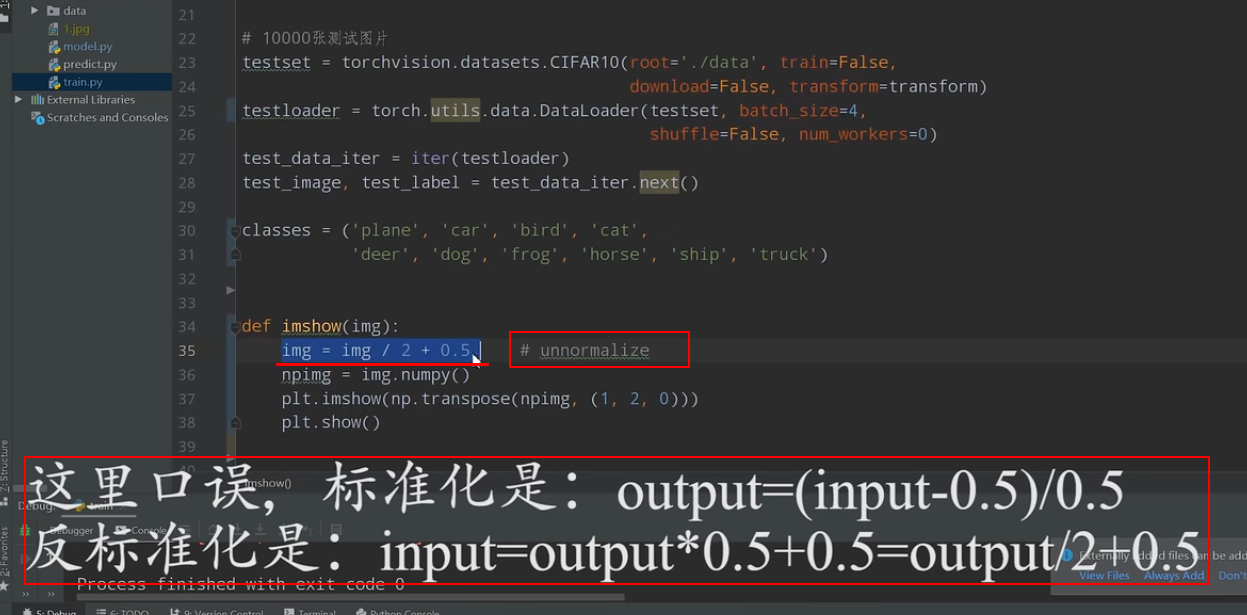

给出自己测试过的代码




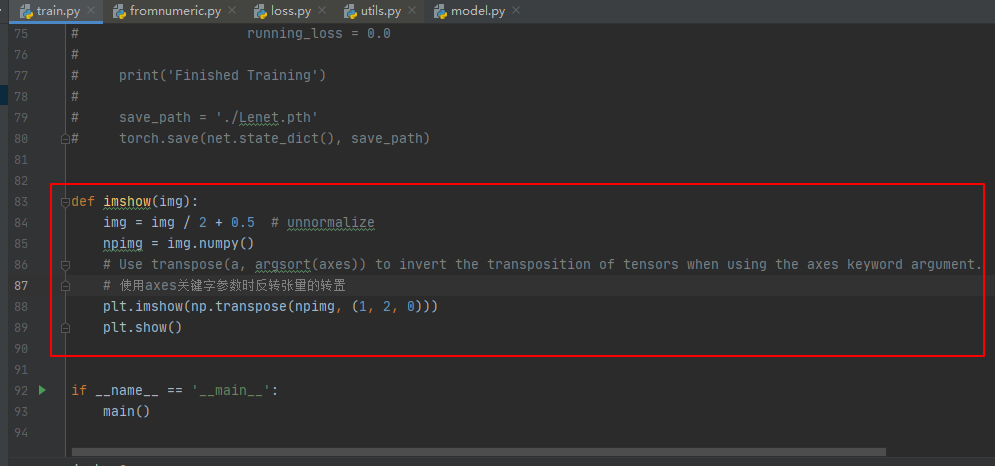

在main函数调用该方法

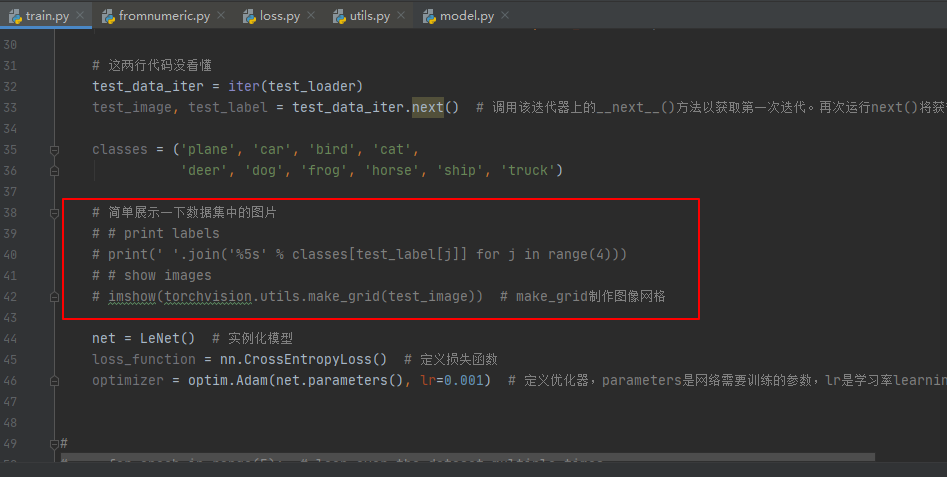

In [ ]:
if __name__ == '__main__':
    main()

训练结果

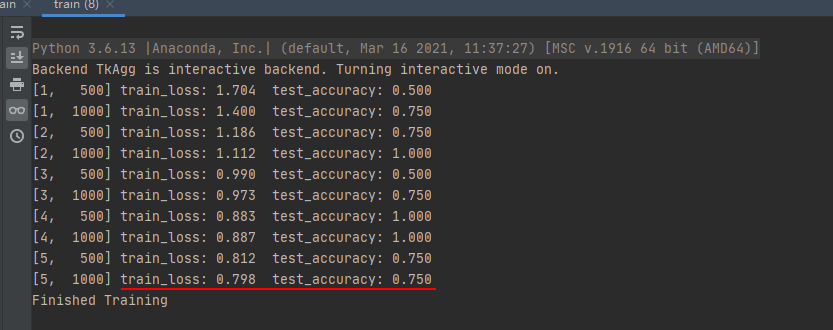